In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
plt.style.use('ggplot')

**Data generation**

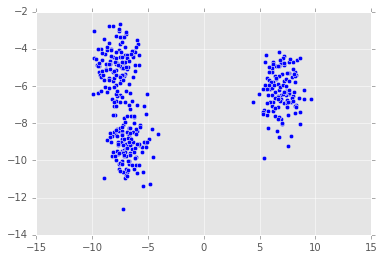

In [2]:
n = 3
points, y = make_blobs(n_samples=400, n_features=8, centers=n,
                     cluster_std=1, random_state=15)
plt.scatter(points[:,0], points[:,1])

**Initialization of centroids**

In [3]:
def centroids(points,k):
    centr = points[:]
    np.random.shuffle(centr)
    return centr[:k]

**Return the closest centroid for each point**

In [4]:
def closest(points,centr):
    distances = np.sqrt(((points - centr[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

**Move centroids to the mean location associated with it**

In [5]:
def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [6]:
def cost_func(moved_centroid, centroids):
    return np.sqrt((moved_centroid - centroids)**2).sum(axis = 2).all()

**Return class for each point with given accuracy**

In [7]:
def k_means(points,k, accuracy):
    c = centroids(points,k)
    while cost_func(move_centroids(points, closest(points, c), c)[:, np.newaxis],
                    c[:, np.newaxis])>accuracy:
        c = move_centroids(points, closest(points, c), c)
        #print(c)
    return closest(points, c)

**Visualization**

[2 1 2 2 0 2 2 0 0 0 2 0 0 1 2 1 1 1 2 1 0 1 0 1 0 2 0 0 0 2 0 1 1 0 2 2 1
 0 1 1 1 2 1 1 0 0 0 0 1 1 2 1 2 1 0 1 1 2 0 0 0 1 0 1 2 1 0 1 1 0 2 1 0 2
 0 2 2 2 1 2 0 1 2 0 0 1 1 1 0 0 0 2 2 0 0 1 1 2 2 0 1 0 0 0 1 2 2 1 1 2 2
 2 1 0 0 1 2 0 0 1 1 2 0 1 2 1 2 2 2 0 2 0 2 1 2 1 0 2 1 2 2 2 0 2 2 2 1 0
 1 2 0 1 0 0 1 2 0 2 0 0 1 1 2 2 1 0 1 1 0 2 2 2 2 1 0 0 1 1 1 2 2 1 0 2 0
 1 0 1 2 2 1 2 1 1 2 0 0 0 0 2 1 2 1 2 2 0 2 1 0 2 0 1 1 1 0 1 0 2 0 0 1 1
 2 0 0 0 0 1 0 2 0 1 0 2 2 0 2 1 2 2 1 1 0 1 2 1 0 0 1 0 0 0 1 1 2 2 2 1 0
 1 1 1 2 1 1 0 1 1 2 2 2 0 1 1 1 2 0 2 2 2 2 0 0 2 0 1 0 0 1 1 2 2 0 2 0 1
 2 0 2 1 2 1 1 0 2 0 2 1 0 0 0 1 0 0 1 2 2 2 2 2 2 2 1 2 0 1 2 0 2 1 0 2 0
 1 2 0 0 2 0 2 2 0 2 2 2 0 2 2 2 1 1 0 2 1 1 0 0 1 2 0 0 0 0 1 1 1 2 1 0 1
 2 1 1 2 1 1 2 0 0 1 1 1 2 0 2 0 0 1 1 2 2 1 0 1 1 1 0 0 2 0]


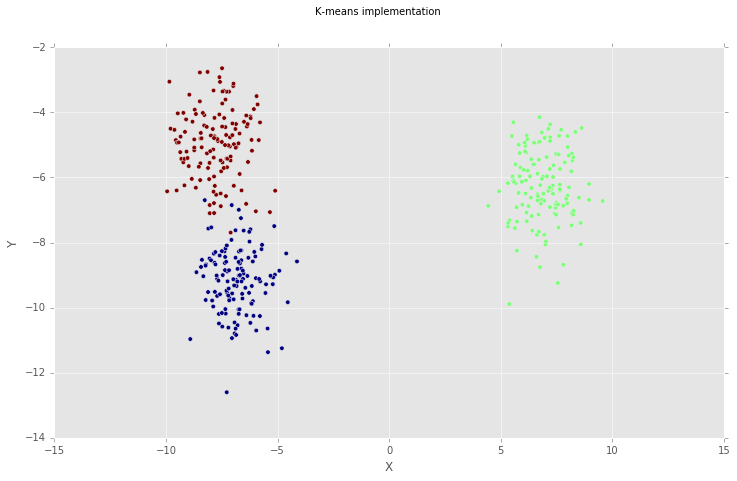

In [8]:
fin = k_means(points,n, 0.000001)
print(fin)
fig, axes = plt.subplots(figsize  =(12,7))
axes.scatter(points[:,0], points[:,1], c = fin)
axes.set_xlabel('X')
axes.set_ylabel('Y')
fig.suptitle('K-means implementation')

**Comparing with Sklearn**

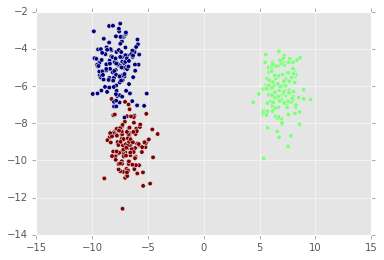

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n, random_state=0).fit(points)
sk_preds = kmeans.predict(points)
plt.scatter(points[:,0], points[:,1], c = sk_preds)